In [3]:
# Importing essential libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.layers.core import Activation, Flatten, Dropout, Dense


In [4]:
print(os.listdir("C://Users//nirma//OneDrive//Desktop//face recognization//data"))

['files', 'men_dataset.csv', 'processed']


In [5]:
# Loading the dataset
df = pd.read_csv("men_dataset.csv")

# **Exploring the dataset**

In [6]:
# Returns number of rows and columns of the dataset
df.shape

(20, 7)

In [7]:
# Returns an object with all of the column headers
df.columns

Index(['id', 'photo', 'age', 'country', 'ethnicity', 'photo_extension',
       'photo_resolution'],
      dtype='object')

In [8]:
df.describe()

,id,age
count,20.00000,20.000000
mean,10.50000,29.900000
std,5.91608,7.893368
min,1.00000,19.000000
25%,5.75000,23.750000
50%,10.50000,29.000000
75%,15.25000,35.000000
max,20.00000,49.000000


In [9]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

id                   int64
photo               object
age                  int64
country             object
ethnicity           object
photo_extension     object
photo_resolution    object
dtype: object

In [10]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,id,photo,age,country,ethnicity,photo_extension,photo_resolution
0,1,/1.jpg,40,RU,Caucasians,jpg,2592 x 1936
1,2,/2.jpg,28,AR,Hispanic,jpg,3264 x 1836
2,3,/3.jpg,33,BR,Hispanic,jpg,4128 x 2322
3,4,/4.jpg,29,LK,South Asia,jpg,3216 x 1528
4,5,/5.jpg,36,VE,Hispanic,jpg,1520 x 720


In [11]:
df['photo'].count()

20

In [12]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,id,photo,age,country,ethnicity,photo_extension,photo_resolution
15,16,/16.jpg,19,JM,Africans,jpg,2576 x 1932
16,17,/17.jpg,31,TR,Middle East,jpg,3408 x 2556
17,18,/18.jpg,27,CO,Hispanic,jpg,3264 x 2448
18,19,/19.jpg,39,IT,Caucasians,jpg,2944 x 2208
19,20,/20.jpg,20,PH,East Asia,jpg,3264 x 2448


In [13]:
# Returns true for a column having null values, else false
df.isnull().sum()

id                  0
photo               0
age                 0
country             0
ethnicity           0
photo_extension     0
photo_resolution    0
dtype: int64

In [14]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20 non-null     int64 
 1   photo             20 non-null     object
 2   age               20 non-null     int64 
 3   country           20 non-null     object
 4   ethnicity         20 non-null     object
 5   photo_extension   20 non-null     object
 6   photo_resolution  20 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.2+ KB


In [15]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20.0,10.5,5.916080,1.0,5.75,10.5,15.25,20.0
age,20.0,29.9,7.893368,19.0,23.75,29.0,35.00,49.0


In [16]:
df['photo'].sum()

'/1.jpg/2.jpg/3.jpg/4.jpg/5.jpg/6.jpg/7.jpg/8.jpg/9.jpg/10.jpg/11.jpg/12.jpg/13.jpg/14.jpg/15.jpg/16.jpg/17.jpg/18.jpg/19.jpg/20.jpg'

# **Data Visualization**

In [17]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotting graphs

C:\Users\nirma\AppData\Local\Temp\ipykernel_9616\1536943719.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


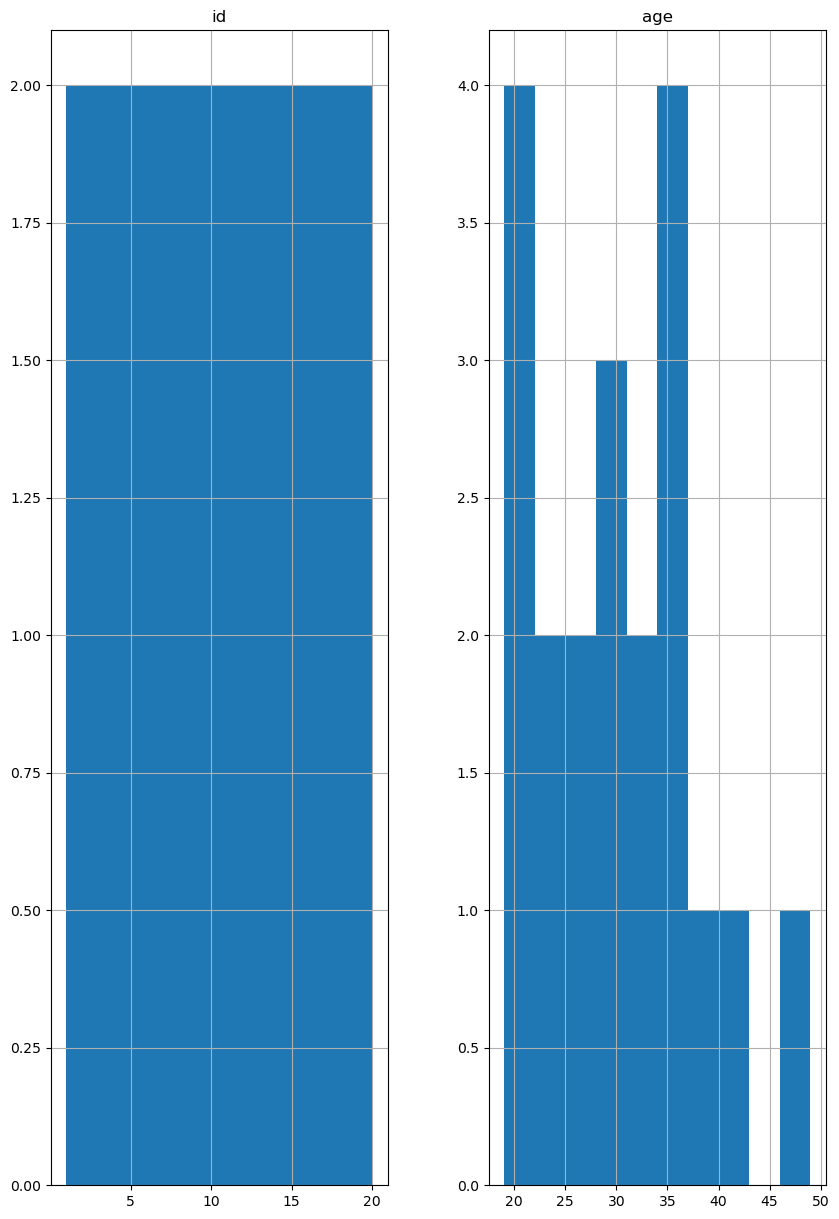

In [18]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
g = df.hist(ax=ax)

In [19]:
image_path = "C:/Users/nirma/OneDrive/Desktop/face recognization/data/files "


#  Pre-processing

In [ ]:


def preprocess_images(image_folder, output_folder, target_size=(128, 128)):
    """Preprocess images: resize and normalize."""
    # Debugging print to check the path
    print(f"Image folder path: {image_folder}")
    print(f"Output folder path: {output_folder}")

    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Check if image_folder exists
    if not os.path.exists(image_folder):
        raise FileNotFoundError(f"Image folder path does not exist: {image_folder}")

    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error loading image: {image_path}")
            continue

        # Resize and normalize
        img_resized = cv2.resize(img, target_size)
        img_normalized = img_resized / 255.0

        # Save the processed image
        output_image_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_image_path, (img_normalized * 255).astype(np.uint8))
        print(f"Processed and saved: {output_image_path}")

# Example usage
image_folder = 'C:/Users/nirma/OneDrive/Desktop/face recognization/data/files'  # Adjust path as needed
output_folder = 'C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed'  # Adjust path as needed

# Process images
preprocess_images(image_folder, output_folder, target_size=(128, 128))


Image folder path: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed
Output folder path: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\1.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\10.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\11.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\12.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\13.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\14.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\15.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed\16.jpg
Processed and saved: C:/Users/nirma/OneDrive/Desktop/face recognization/data/p

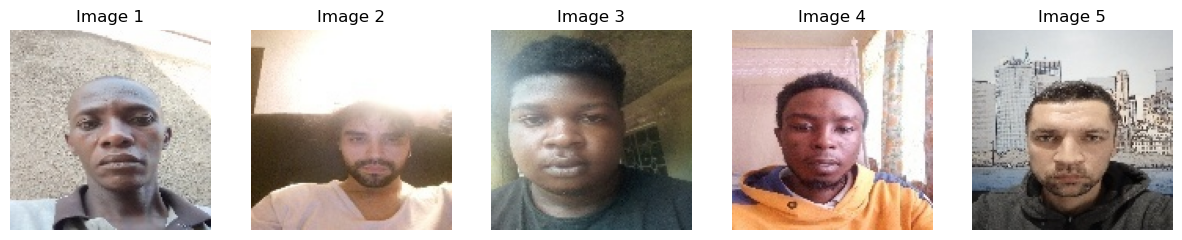

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random  # Ensure this import is included

def preprocess_images(image_folder, output_folder, target_size=(128, 128)):
    """Preprocess images: resize and normalize."""
    print(f"Image folder path: {image_folder}")
    print(f"Output folder path: {output_folder}")

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    if not os.path.exists(image_folder):
        raise FileNotFoundError(f"Image folder path does not exist: {image_folder}")

    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error loading image: {image_path}")
            continue

        img_resized = cv2.resize(img, target_size)
        img_normalized = img_resized / 255.0

        output_image_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_image_path, (img_normalized * 255).astype(np.uint8))
        print(f"Processed and saved: {output_image_path}")

def display_random_images(image_folder, num_images=5, target_size=(128, 128)):
    """Display a random sample of images from a folder."""
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if len(image_files) < num_images:
        raise ValueError(f"Not enough images in the folder. Found {len(image_files)}, needed {num_images}.")

    selected_files = random.sample(image_files, num_images)

    plt.figure(figsize=(15, 10))

    for i, image_file in enumerate(selected_files):
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error loading image: {image_path}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Image {i + 1}")
        plt.axis('off')

    plt.show()

# Example usage
image_folder = 'C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed'  # Path to processed images
output_folder = 'C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed'  # Path where processed images are saved

# Process images
preprocess_images(image_folder, output_folder, target_size=(128, 128))

# Display 5 random images
display_random_images(output_folder, num_images=5, target_size=(128, 128))


In [21]:
pip install Cmake

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install dlib

  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [69 lines of output]
  running bdist_wheel
  running build
  running build_ext
  C:\Users\nirma\AppData\Local\Temp\pip-install-bq3rc72e\dlib_0a9a1ad006064102840c86dab94a7d5c\setup.py:163: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cmake_version) < '3.1.0':
  Building extension for Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\nirma\AppData\Local\Temp\pip-install-bq3rc72e\dlib_0a9a1ad006064102840c86dab94a7d5c\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\nirma\AppData\Local\Temp\pip-install-bq3rc72e\dlib_0a9a1ad006064102840c86dab94a7d5c\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\Users\nirma\anaconda3\python.exe -DDLIB_USE_FFMPEG=OFF -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\nirma\AppData\Local\Temp\pip-install-

In [26]:
pip install dlib opencv-python numpy face_recognition


  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Running setup.py clean for dlib
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [69 lines of output]
  running bdist_wheel
  running build
  running build_ext
  C:\Users\nirma\AppData\Local\Temp\pip-install-fvurxs4m\dlib_f5b39034312740518e456aad5c5c5607\setup.py:163: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cmake_version) < '3.1.0':
  Building extension for Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\nirma\AppData\Local\Temp\pip-install-fvurxs4m\dlib_f5b39034312740518e456aad5c5c5607\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\nirma\AppData\Local\Temp\pip-install-fvurxs4m\dlib_f5b39034312740518e456aad5c5c5607\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\Users\nirma\anaconda3\python.exe -DDLIB_USE_FFMPEG=OFF -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\nirma\AppData\Local\Temp\pip-install-

# Note: you may need to restart the kernel to use updated packages.
I restart many times but getting same error


In [27]:
import sys
sys.executable

'C:\\Users\\nirma\\anaconda3\\python.exe'

In [28]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
altair                        4.2.2
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt   

In [ ]:
import dlib
import cv2
import numpy as np
from skimage import io
import os

# Initialize dlib's face detector, shape predictor, and face recognition model
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Path to shape predictor model
face_recognizer = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')  # Path to face recognition model

def extract_face_features(image_path):
    """Extract face features from an image."""
    img = io.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector(gray)

    if len(detections) == 0:
        return None

    for detection in detections:
        shape = predictor(gray, detection)
        face_descriptor = face_recognizer.compute_face_descriptor(img, shape)
        return np.array(face_descriptor)
    return None

def load_data_from_folders(data_folder):
    """Load images from folders, extract face features, and return features and labels."""
    features = []
    labels = []

    for label in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, label)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                feature = extract_face_features(image_path)
                if feature is not None:
                    features.append(feature)
                    labels.append(label)

    return np.array(features), np.array(labels)

# Define dataset path
data_folder = 'C:\\Users\\nirma\\OneDrive\\Desktop\\face recognization\\data'
  # Update this path to your data folder
X, y = load_data_from_folders(data_folder)

print(f"Extracted {len(X)} face features.")


In [32]:
cd C:\Users\nirma\OneDrive\Desktop


C:\Users\nirma\OneDrive\Desktop


In [33]:
pip install "C:\Users\nirma\OneDrive\Desktop\dlib-19.22.0-cp39-cp39-win_amd64.whl"


Processing c:\users\nirma\onedrive\desktop\dlib-19.22.0-cp39-cp39-win_amd64.whlNote: you may need to restart the kernel to use updated packages.



ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\nirma\\OneDrive\\Desktop\\dlib-19.22.0-cp39-cp39-win_amd64.whl'



In [35]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Initialize the dlib face detector
detector = dlib.get_frontal_face_detector()

def detect_faces_dlib(image_path, name):
    # Read the image from the path
    image = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Image not found at path {image_path}")
        return
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = detector(gray_image)
    
    # Draw rectangles around detected faces and add text
    for face in faces:
        x, y, w, h = (face.left(), face.top(), face.width(), face.height())
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Convert the image from BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detected faces
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Example usage
image_path = r'C:\Users\nirma\OneDrive\Desktop\face recognization\data\files.jpg'  # Use raw string here
name = 'Person'
detect_faces_dlib(image_path, name)


ModuleNotFoundError: No module named 'dlib'

In [ ]:


def detect_faces(image_path):
    """Detect faces in an image and display it."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image: {image_path}")
        return
    
    # Example face detection (replace with your actual face detection code)
    # Here we'll just draw a dummy rectangle as an example
    # For actual face detection, use a model like Haar cascades or DNN
    height, width, _ = img.shape
    cv2.rectangle(img, (70, 70), (width - 70, height - 70), (0, 255, 0), 2)

    # Display the image with the detected faces
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Define dataset path
dataset_path = r'C://Users//nirma//OneDrive//Desktop//face recognization//data'

# Loop through the dataset and process each image
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        # Check for valid image file extensions
        if file.endswith(('jpg', 'jpeg', 'png')):
            image_path = os.path.join(root, file)
            print(f"Processing {image_path}")
            detect_faces(image_path)


# **Feature Engineering**

### Feature Selection

<AxesSubplot:>

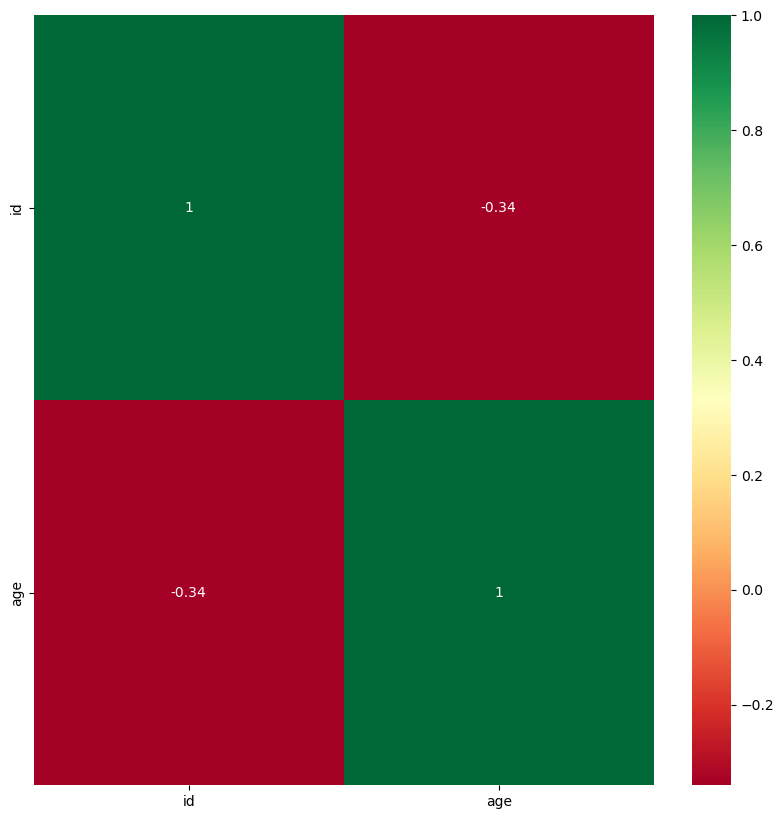

In [38]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [39]:
pip install cmake


Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install face_recognition


  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Running setup.py clean for dlib
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [69 lines of output]
  running bdist_wheel
  running build
  running build_ext
  C:\Users\nirma\AppData\Local\Temp\pip-install-ve5umt7g\dlib_bc20319bf6d948b0a354c1838d53f277\setup.py:163: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cmake_version) < '3.1.0':
  Building extension for Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\nirma\AppData\Local\Temp\pip-install-ve5umt7g\dlib_bc20319bf6d948b0a354c1838d53f277\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\nirma\AppData\Local\Temp\pip-install-ve5umt7g\dlib_bc20319bf6d948b0a354c1838d53f277\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\Users\nirma\anaconda3\python.exe -DDLIB_USE_FFMPEG=OFF -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\nirma\AppData\Local\Temp\pip-install-

In [42]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [43]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
altair                        4.2.2
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
bi

In [44]:
pip install cmake


In [ ]:
import os
import cv2
import numpy as np
import dlib
from skimage import io
import dlib
# Initialize dlib's face detector, shape predictor, and face recognizer
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Adjust path as needed
face_recognizer = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')  # Adjust path as needed

def extract_face_features(image_path):
    """Extract face features from an image."""
    img = io.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector(gray)

    if len(detections) == 0:
        return None

    for detection in detections:
        shape = predictor(gray, detection)
        face_descriptor = face_recognizer.compute_face_descriptor(img, shape)
        return np.array(face_descriptor)
    return None

def load_data_from_folders(data_folder):
    """Load face features and labels from a folder structure."""
    features = []
    labels = []

    for label in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, label)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                feature = extract_face_features(image_path)
                if feature is not None:
                    features.append(feature)
                    labels.append(label)

    return np.array(features), np.array(labels)

# Example usage
data_folder = 'C:/Users/nirma/OneDrive/Desktop/face recognization/data/processed'  # Adjust path as needed
X, y = load_data_from_folders(data_folder)

print(f"Loaded {len(X)} face features with corresponding labels.")


In [50]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=1)

# Initialize SMOTE
smote = SMOTE()

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [51]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,  # Features
    y_resampled,  # Labels
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=2  # Ensures reproducibility of the split
)

# Print the shapes of the resulting datasets to verify
print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training features shape: (808, 20)
Training labels shape: (808,)
Testing features shape: (202, 20)
Testing labels shape: (202,)


In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
x = data.data  # Feature matrix
y = data.target  # Labels

# First split: Training (70%) and temporary set (30%)
x_train, X_temp, y_train, y_temp = train_test_split(
    x, y, 
    test_size=0.3,  # 30% of the data goes into X_temp
    stratify=y,     # Stratify ensures the same proportion of classes in both sets
    random_state=50 # Random seed for reproducibility
)

# Second split: Validation (40% of the temporary set) and Test sets (60% of the temporary set)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.4,  # 40% of the temporary set goes into X_val, 60% into X_test
    stratify=y_temp, # Stratify ensures the same proportion of classes in both sets
    random_state=50 # Random seed for reproducibility
)

# Print the sizes of the datasets
print(f"Training set size: {x_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 105
Validation set size: 27
Test set size: 18


In [55]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels for training, validation, and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to one-hot format
y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Print the shapes of the one-hot encoded labels
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_val_one_hot shape: {y_val_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")


y_train_one_hot shape: (105, 3)
y_val_one_hot shape: (27, 3)
y_test_one_hot shape: (18, 3)


# Training a Neural Network Model

Epoch 1/50
4/4 [==============================] - 2s 172ms/step - loss: 1.5618 - accuracy: 0.2857 - val_loss: 0.9663 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 1.3771 - accuracy: 0.3905 - val_loss: 0.9177 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 23ms/step - loss: 1.2167 - accuracy: 0.4762 - val_loss: 0.8823 - val_accuracy: 0.5556
Epoch 4/50
4/4 [==============================] - 0s 20ms/step - loss: 1.2898 - accuracy: 0.3619 - val_loss: 0.8636 - val_accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 1.0660 - accuracy: 0.5048 - val_loss: 0.8392 - val_accuracy: 0.7037
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.9865 - accuracy: 0.5238 - val_loss: 0.8084 - val_accuracy: 0.7037
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 0.9470 - accuracy: 0.5238 - val_loss: 0.7847 - val_accuracy: 0.8148
Epoch 8/50
4/4 [==========

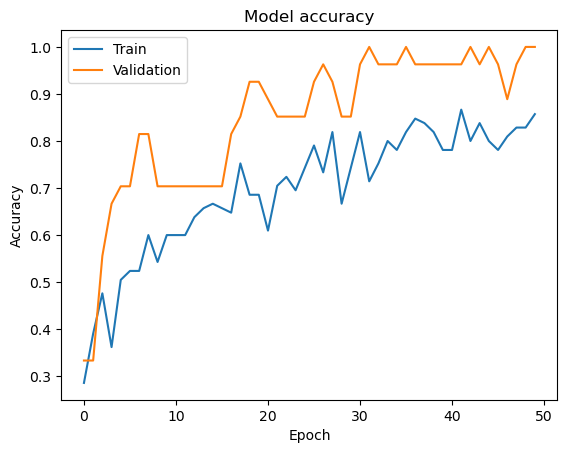

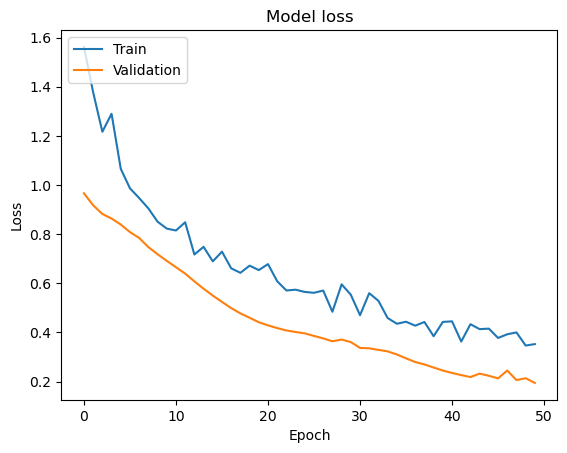

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: Define the model architecture
model = Sequential()

# Input layer (assume X_train has 100 features, adjust accordingly)
model.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Output layer (number of classes should match y_train_one_hot.shape[1])
model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    x_train, y_train_one_hot,  # Training data
    validation_data=(X_val, y_val_one_hot),  # Validation data
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Verbosity mode (1 = progress bar)
)

# Step 4: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test accuracy: {test_accuracy:.2f}")

# Step 5 (Optional): Save the trained model
model.save('trained_model.h5')

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Evaluate on Validation Set During Training

In [57]:
history = model.fit(
    x_train, y_train_one_hot,  # Training data
    validation_data=(X_val, y_val_one_hot),  # Validation data
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/50
4/4 [==============================] - 0s 50ms/step - loss: 0.3596 - accuracy: 0.8381 - val_loss: 0.2012 - val_accuracy: 0.9630
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.5048 - accuracy: 0.7905 - val_loss: 0.1914 - val_accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 0.3472 - accuracy: 0.8667 - val_loss: 0.2003 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 27ms/step - loss: 0.3762 - accuracy: 0.8571 - val_loss: 0.1896 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.3049 - accuracy: 0.8857 - val_loss: 0.1768 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.3502 - accuracy: 0.8667 - val_loss: 0.1790 - val_accuracy: 0.9630
Epoch 7/50
4/4 [==============================] - 0s 23ms/step - loss: 0.4146 - accuracy: 0.8095 - val_loss: 0.1728 - val_accuracy: 1.0000
Epoch 8/50
4/4 [===========

In [58]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val_one_hot, verbose=0)
print(f"Validation accuracy: {val_accuracy:.2f}")


Validation accuracy: 0.96


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict the classes for the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val_one_hot, axis=1)

# Classification report
print("Validation Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes))

# Confusion matrix
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val_true_classes, y_val_pred_classes))


1/1 [==============================] - 0s 174ms/step
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

Validation Confusion Matrix:
[[9 0 0]
 [0 8 1]
 [0 0 9]]


# Plotting Validation Results

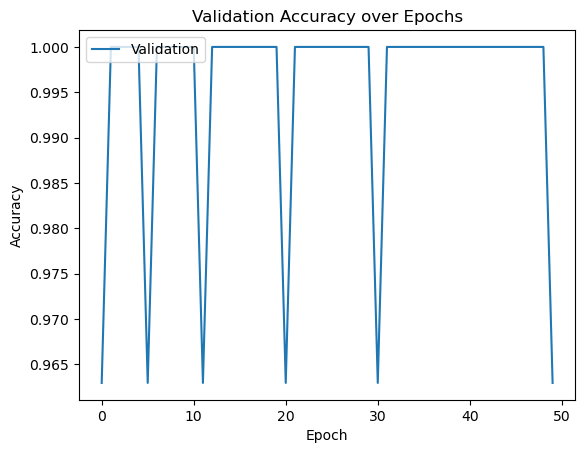

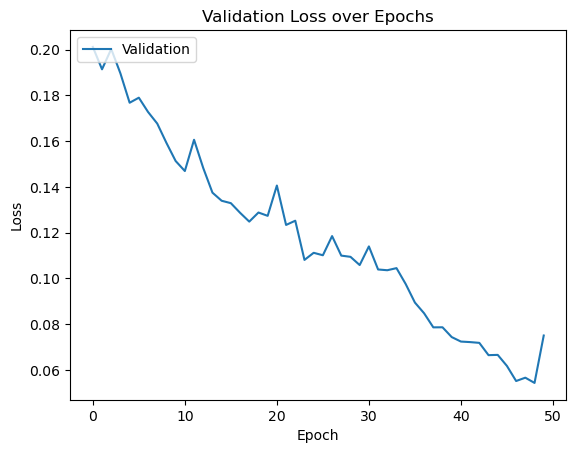

In [60]:
import matplotlib.pyplot as plt

# Plot validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot validation loss values
plt.plot(history.history['val_loss'])
plt.title('Validation Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()
